In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
import lightgbm as lgb



In [3]:
train_data = pd.read_csv('main_dataset.csv')
train_data.describe()

,Tsi,Tox,Ns,Nc,Nd,Vds,Vgs,Id
count,581291.0,581291.000000,5.812910e+05,5.812910e+05,5.812910e+05,581291.000000,581291.000000,5.812910e+05
mean,10.0,2.000858,1.887125e+19,5.414729e+16,1.844034e+19,0.501280,0.990323,3.720221e-05
std,0.0,0.816515,3.276053e+19,4.499196e+16,3.250304e+19,0.344501,0.586455,1.528166e-04
min,10.0,1.000000,1.000000e+16,1.000000e+16,1.000000e+16,0.000000,0.000000,4.819296e-24
25%,10.0,1.000000,1.000000e+17,1.000000e+16,1.000000e+17,0.200000,0.482951,5.330000e-18
50%,10.0,2.000000,1.000000e+18,1.000000e+16,1.000000e+18,0.600000,0.992951,5.240000e-17
75%,10.0,3.000000,1.000000e+19,1.000000e+17,1.000000e+19,0.800000,1.493600,4.030000e-09
max,10.0,3.000000,1.000000e+20,1.000000e+17,1.000000e+20,1.000000,2.000000,2.454478e-03


In [4]:
train_data['Id'] = np.where(train_data['Id'] < 1e-18, 1e-18, train_data['Id'])
train_data['Log_Id'] = np.log10(train_data['Id'])

In [5]:
X = train_data[['Tox','Nc', 'Nd', 'Ns', 'Vds', 'Vgs']] # ignoring Nc
y = train_data['Log_Id']


poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42, shuffle = True)

model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=7, 
                          random_state=42, n_jobs = -1, feature_fraction= 0.8,
                          )
model.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.154043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8344
[LightGBM] [Info] Number of data points in the train set: 523161, number of used features: 83
[LightGBM] [Info] Start training from score -13.545789


LGBMRegressor(feature_fraction=0.8, max_depth=7, n_estimators=1000, n_jobs=-1,
              random_state=42)

In [45]:
# the above code eas execulted on google collab with TPU processor, since it is taking more than 1 hour to train the model in laptop
# importing the trained model
import joblib 
# model = joblib.load('light_bgm_model.joblib')
model.score(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


0.9991898552325907

In [46]:
y_pred_1 = model.predict(X_test)
print(r2_score(y_pred_1, y_test))

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
0.9991060411671253


In [ ]:
# note :
# 1. Ignored - column - Tsi
# the train inputs are preprocesses with polynomail features (degree = 3, include_bias = False)
# train inputs are further processed StanderScaler
# while testing the test data - first preprocess the data by removing the values less than 1e-18
# preprocess - data with poly(which was fitted on to the train) and scaler (which wass fitted on train)

# model predicts the log(Id) value

In [48]:
# testing the model on the test data set 
#  importing the testt data
test_data = pd.read_csv('test_data.csv')


In [49]:
print(test_data[test_data['Vgs'] == 2].index.tolist())

[202, 405, 608, 811, 1014]


In [50]:
test_data = test_data.iloc[0:202]
print(test_data)

     Tsi  Tox            Ns            Nc            Nd  Vds       Vgs  \
0     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.000000   
1     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.002000   
2     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.005733   
3     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.012951   
4     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.022951   
..   ...  ...           ...           ...           ...  ...       ...   
197   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.952951   
198   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.962951   
199   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.972951   
200   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.982951   
201   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.992951   

               Id  
0    2.330000e-18  
1    4.340000e-18  
2    1.130000e-18  
3    5.430000e-19  
4    4.5200

In [51]:
test_data['Id'] = np.where(test_data['Id'] < 1e-18, 1e-18, test_data['Id'])
test_data['Log_Id'] = np.log10(test_data['Id'])

X_test_1 = test_data[[ 'Tox','Nc', 'Nd', 'Ns', 'Vds', 'Vgs']]
y_test_1 = test_data['Log_Id']

In [52]:
X_test_1_transformed = poly.transform(X_test_1)
X_test_1_scaled = scaler.transform(X_test_1_transformed)

y_pred_test_1 = model.predict(X_test_1_scaled)
print(r2_score(y_pred_test_1, y_test_1))
print("mean_absolute_error = ", mean_absolute_error(y_pred_test_1, y_test_1))

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
0.9943330818555369
mean_absolute_error =  0.17825163274655953


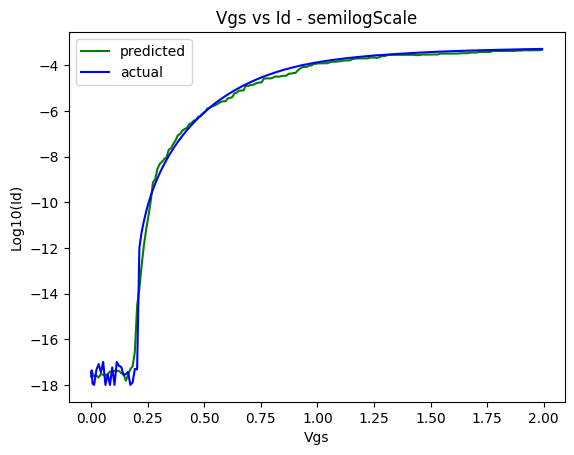

In [53]:
# plotting the data 
plt.plot(X_test_1['Vgs'], y_pred_test_1, color = "green", label="predicted")
plt.plot(X_test_1['Vgs'], y_test_1, color = "blue", label="actual")
plt.title('Vgs vs Id - semilogScale')
plt.xlabel('Vgs')
plt.ylabel('Log10(Id)')
plt.legend()
plt.show()

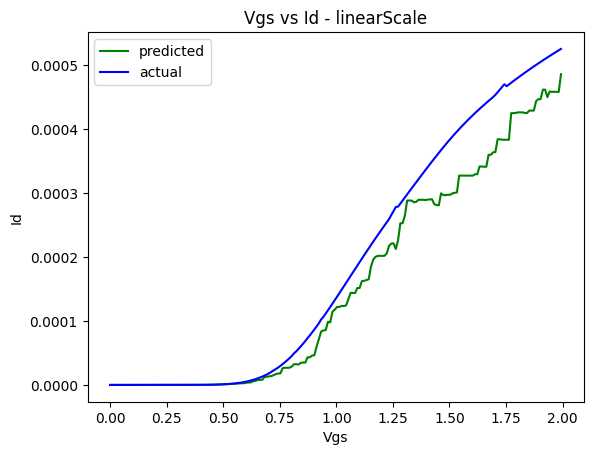

In [54]:
# plotting the data 

plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_pred_test_1), 1e-18), color = "green", label="predicted")
plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_test_1), 1e-18), color = "blue", label="actual")
plt.title('Vgs vs Id - linearScale')
plt.xlabel('Vgs')
plt.ylabel('Id')
plt.legend()
plt.show()

In [55]:
# import  numpy as np 

# a = np.linspace(0, 2, 100)
# b = np.repeat(100, 100)

# import pandas as pd
# data = np.column_stack((a, b))

# data = pd.DataFrame(data, columns = ["a", "b"])
# data
